# **Imports**

### Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

### Loading CSVs

In [2]:
attacking_df = pd.read_csv('/Users/lukewalker/code/Wukelalks/player_performance_model/1_Champions_Leagues_Dataset/attacking_data.csv')
attempts_df = pd.read_csv('/Users/lukewalker/code/Wukelalks/player_performance_model/1_Champions_Leagues_Dataset/attempts_data.csv')
defending_df = pd.read_csv('/Users/lukewalker/code/Wukelalks/player_performance_model/1_Champions_Leagues_Dataset/defending_data.csv')
disciplinary_df = pd.read_csv('/Users/lukewalker/code/Wukelalks/player_performance_model/1_Champions_Leagues_Dataset/disciplinary_data.csv')
distribution_df = pd.read_csv('/Users/lukewalker/code/Wukelalks/player_performance_model/1_Champions_Leagues_Dataset/distribution_data.csv')
goalkeeping_df = pd.read_csv('/Users/lukewalker/code/Wukelalks/player_performance_model/1_Champions_Leagues_Dataset/goalkeeping_data.csv')
goals_df = pd.read_csv('/Users/lukewalker/code/Wukelalks/player_performance_model/1_Champions_Leagues_Dataset/goals_data.csv')
key_stats_df = pd.read_csv('/Users/lukewalker/code/Wukelalks/player_performance_model/1_Champions_Leagues_Dataset/key_stats_data.csv')
players_df = pd.read_csv('/Users/lukewalker/code/Wukelalks/player_performance_model/1_Champions_Leagues_Dataset/players_data.csv')

In [3]:
valuations_df = pd.read_csv('/Users/lukewalker/code/Wukelalks/player_performance_model/2_Player_Valuation_CSVs/defender_valuations.csv')

### Renaming Name Column in valuations_df

In [4]:
# Rename the column 'name' to 'player_name'
valuations_df.rename(columns={'Name': 'player_name'}, inplace=True)

In [5]:
valuations_df.head()

,player_name,Position,Age,Market Value,Club Name
0,William Saliba,Centre-Back,23,€80.00m,Arsenal FC
1,Rúben Dias,Centre-Back,27,€75.00m,Manchester City
2,Josko Gvardiol,Left-Back,23,€75.00m,Manchester City
3,Trent Alexander-Arnold,Right-Back,26,€75.00m,Liverpool FC
4,Alessandro Bastoni,Centre-Back,25,€75.00m,Inter Milan


# Merging Defenders Dataset

In [6]:
base_path = '/Users/lukewalker/code/Wukelalks/player_performance_model/1_Champions_Leagues_Dataset/'

# Read CSV files

# Filter for defenders only
defenders_df = players_df[players_df['field_position'].str.contains('Defender', na=False)]

# List of dataframes to merge (excluding `players_df` since we already filtered defenders)
dfs = [attacking_df, attempts_df, defending_df, disciplinary_df, distribution_df, 
       goalkeeping_df, goals_df, key_stats_df]

# Merge only defenders' data
merged_defenders_df = defenders_df  # Start with defenders

for df in dfs:
    merged_defenders_df = merged_defenders_df.merge(df, on='id_player', how='left')  # Adjust key if needed

# Save the defenders-only dataset
merged_defenders_df.to_csv(base_path + 'merged_defenders_stats.csv', index=False)

print("Merged Defenders DataFrame shape:", merged_defenders_df.shape)

Merged Defenders DataFrame shape: (306, 53)


# Merging Defenders and Valuations Datasets

In [7]:
# Check the player_name column in both DataFrames
print("\nSample Rows from defenders_df:")
print(defenders_df[['player_name']].head())

print("\nSample Rows from valuations_df:")
print(valuations_df[['player_name']].head())


Sample Rows from defenders_df:
         player_name
5    Antonio Rüdiger
7       Thilo Kehrer
9      Achraf Hakimi
10     Ryan Flamingo
11  Miguel Gutiérrez

Sample Rows from valuations_df:
              player_name
0          William Saliba
1              Rúben Dias
2          Josko Gvardiol
3  Trent Alexander-Arnold
4      Alessandro Bastoni


In [26]:
# Ensure defenders_df is a copy, not a view
defenders_df = defenders_df.copy()

# Now apply the string manipulation
defenders_df['player_name'] = defenders_df['player_name'].str.lower().str.strip()

In [27]:
valuations_df['player_name'] = valuations_df['player_name'].str.lower().str.strip()

In [28]:
# Merge the DataFrames on player_name
merged_df = pd.merge(defenders_df, valuations_df, on='player_name', how='inner')

# Check the resulting shape and data
print("\nShape of merged DataFrame:", merged_df.shape)
print(merged_df.head())


Shape of merged DataFrame: (133, 46)
   id_player       player_name  nationality field_position  age  id_team  \
0  250028211   antonio rüdiger      Germany       Defender   31    50051   
1  250055663      thilo kehrer      Germany       Defender   28    50023   
2  250088061     achraf hakimi      Morocco       Defender   26    52747   
3  250189506     ryan flamingo  Netherlands       Defender   21    50062   
4  250106969  miguel gutiérrez        Spain       Defender   23  2602798   

   assists  corners_taken  offsides  dribbles  ...  head  other  \
0      0.0            0.0       1.0       0.0  ...   2.0    0.0   
1      1.0            0.0       0.0       0.0  ...   0.0    0.0   
2      0.0            0.0       0.0      14.0  ...   0.0    0.0   
3      0.0            0.0       0.0       0.0  ...   0.0    0.0   
4      0.0            3.0       0.0      10.0  ...   0.0    0.0   

   penalties_scored  distance_covered(km/h)  top_speed  minutes_played  \
0               0.0         

In [29]:
merged_df.head(133)

,id_player,player_name,nationality,field_position,age,id_team,assists,corners_taken,offsides,dribbles,...,head,other,penalties_scored,distance_covered(km/h),top_speed,minutes_played,Position,Age,Market Value,Club Name
0,250028211,antonio rüdiger,Germany,Defender,31,50051,0.0,0.0,1.0,0.0,...,2.0,0.0,0.0,39.28,31.70,360.0,Centre-Back,31,€24.00m,Real Madrid
1,250055663,thilo kehrer,Germany,Defender,28,50023,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,37.94,32.48,360.0,Centre-Back,28,€15.00m,AS Monaco
2,250088061,achraf hakimi,Morocco,Defender,26,52747,0.0,0.0,0.0,14.0,...,0.0,0.0,0.0,44.88,36.55,360.0,Right-Back,26,€60.00m,Paris Saint-Germain
3,250189506,ryan flamingo,Netherlands,Defender,21,50062,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,44.37,32.14,360.0,Centre-Back,22,€16.00m,PSV Eindhoven
4,250106969,miguel gutiérrez,Spain,Defender,23,2602798,0.0,3.0,0.0,10.0,...,0.0,0.0,0.0,43.79,31.57,360.0,Left-Back,23,€25.00m,Girona FC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,250056861,oleksandr zinchenko,Ukraine,Defender,27,52280,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.87,25.50,8.0,Left-Back,28,€30.00m,Arsenal FC
129,250187793,adamo nagalo,Burkina Faso,Defender,22,50062,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.97,28.55,4.0,Centre-Back,22,€7.00m,PSV Eindhoven
130,250128391,jarell quansah,England,Defender,21,7889,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.73,26.80,2.0,Centre-Back,22,€22.00m,Liverpool FC
131,250087431,dan-axel zagadou,France,Defender,25,50107,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.98,28.29,1.0,Centre-Back,25,€6.00m,VfB Stuttgart


In [30]:
# Drop the 'Age' column
merged_df = merged_df.drop(columns=['Age'])

# Rename merged_df to defenders_df
defenders_df = merged_df

In [31]:
defenders_df.head(5)

,id_player,player_name,nationality,field_position,age,id_team,assists,corners_taken,offsides,dribbles,...,left_foot,head,other,penalties_scored,distance_covered(km/h),top_speed,minutes_played,Position,Market Value,Club Name
0,250028211,antonio rüdiger,Germany,Defender,31,50051,0.0,0.0,1.0,0.0,...,0.0,2.0,0.0,0.0,39.28,31.70,360.0,Centre-Back,€24.00m,Real Madrid
1,250055663,thilo kehrer,Germany,Defender,28,50023,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,37.94,32.48,360.0,Centre-Back,€15.00m,AS Monaco
2,250088061,achraf hakimi,Morocco,Defender,26,52747,0.0,0.0,0.0,14.0,...,0.0,0.0,0.0,0.0,44.88,36.55,360.0,Right-Back,€60.00m,Paris Saint-Germain
3,250189506,ryan flamingo,Netherlands,Defender,21,50062,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,44.37,32.14,360.0,Centre-Back,€16.00m,PSV Eindhoven
4,250106969,miguel gutiérrez,Spain,Defender,23,2602798,0.0,3.0,0.0,10.0,...,1.0,0.0,0.0,0.0,43.79,31.57,360.0,Left-Back,€25.00m,Girona FC


# Dropping Columns

In [14]:
# Define columns to drop (including variations)
columns_to_drop = [
    # Duplicate columns (keep only `_x` versions)
    'player_name_y', 'nationality_y', 'field_position_y', 
    'position', 'weight(kg)_y', 'height(cm)_y', 'age_y', 'id_team_y', 
    'player_image', 'player_image_y', 'height(cm)', 'weight(kg)',

    # Unnecessary columns
    'Unnamed: 0', 'matches_appareance',  

    # Goalkeeping-related columns
    'saves', 'goals_conceded', 'saves_on_penalty', 'clean_sheets', 'punches_made'
]

# Drop columns from merged_defenders_df
merged_defenders_df_cleaned = merged_defenders_df.drop(columns=columns_to_drop, errors='ignore')

# Rename `_x` columns to remove `_x` (make sure it applies to all columns ending in '_x')
merged_defenders_df_cleaned = merged_defenders_df_cleaned.rename(columns=lambda col: col.replace('_x', '') if col.endswith('_x') else col)

# Assign cleaned dataframe to defenders_df
defenders_df = merged_defenders_df_cleaned

# Show the cleaned dataframe's columns
print(defenders_df.columns)

Index(['id_player', 'player_name', 'nationality', 'field_position', 'age',
       'id_team', 'assists', 'corners_taken', 'offsides', 'dribbles',
       'total_attempts', 'attempts_on_target', 'attempts_off_target',
       'blocked', 'balls_recovered', 'tackles', 'tackles_won', 'tackles_lost',
       'clearance_attempted', 'fouls_committed', 'fouls_suffered',
       'yellow_cards', 'red_cards', 'passing_accuracy(%)', 'passes_attempted',
       'passes_completed', 'crossing_accuracy(%)', 'crosses_attempted',
       'crosses_completed', 'free_kick_taken', 'matches_appearance', 'goals',
       'inside_area', 'outside_area', 'right_foot', 'left_foot', 'head',
       'other', 'penalties_scored', 'distance_covered(km/h)', 'top_speed',
       'minutes_played'],
      dtype='object')


In [15]:
defenders_df.head(50)

,id_player,player_name,nationality,field_position,age,id_team,assists,corners_taken,offsides,dribbles,...,inside_area,outside_area,right_foot,left_foot,head,other,penalties_scored,distance_covered(km/h),top_speed,minutes_played
0,250028211,Antonio Rüdiger,Germany,Defender,31,50051,0.0,0.0,1.0,0.0,...,2.0,0.0,0.0,0.0,2.0,0.0,0.0,39.28,31.70,360.0
1,250055663,Thilo Kehrer,Germany,Defender,28,50023,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,37.94,32.48,360.0
2,250088061,Achraf Hakimi,Morocco,Defender,26,52747,0.0,0.0,0.0,14.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,44.88,36.55,360.0
3,250189506,Ryan Flamingo,Netherlands,Defender,21,50062,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,44.37,32.14,360.0
4,250106969,Miguel Gutiérrez,Spain,Defender,23,2602798,0.0,3.0,0.0,10.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,43.79,31.57,360.0
5,50327420,Virgil van Dijk,Netherlands,Defender,33,7889,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,37.76,34.92,360.0
6,250096309,Jules Koundé,France,Defender,25,50080,3.0,0.0,0.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.39,31.61,360.0
7,250004363,Stefan Ristovski,North Macedonia,Defender,32,50164,2.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.66,32.02,360.0
8,250139207,Rico Lewis,England,Defender,19,52919,1.0,0.0,2.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.24,32.53,360.0
9,250127492,Kamil Piątkowski,Poland,Defender,24,50030,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.47,32.29,360.0


# Dropping Null Values

In [16]:
defenders_df.shape

(306, 42)

In [17]:
defenders_df.isnull().sum()

id_player                  0
player_name                0
nationality                0
field_position             0
age                        0
id_team                    0
assists                   59
corners_taken             59
offsides                  59
dribbles                  59
total_attempts            59
attempts_on_target        59
attempts_off_target       59
blocked                   59
balls_recovered           59
tackles                   59
tackles_won               59
tackles_lost              59
clearance_attempted       59
fouls_committed           59
fouls_suffered            59
yellow_cards               0
red_cards                  0
passing_accuracy(%)       59
passes_attempted          59
passes_completed          59
crossing_accuracy(%)       0
crosses_attempted         59
crosses_completed         59
free_kick_taken           59
matches_appearance        59
goals                     59
inside_area               59
outside_area              59
right_foot    

In [18]:
# Show rows where 'matches_appearance' is null
null_matches_appearance_rows = defenders_df[defenders_df['matches_appearance'].isnull()]

# Display those rows
print(null_matches_appearance_rows)

     id_player              player_name  nationality field_position  age  \
247  250204164        Morgan Costarelli       France       Defender   19   
248  250201718            Isaac Cossier       France       Defender   17   
249  250199900               Marc Aznar        Spain       Defender   18   
250  250199543      Christopher Olivier      Austria       Defender   18   
251  250196593              Zaid Romero    Argentina       Defender   24   
252  250196544          Tommaso Corazza        Italy       Defender   20   
253  250195173              Pietro Comi        Italy       Defender   19   
254  250192639             Lorin Jetzer  Switzerland       Defender   18   
255  250192405  Michael Anthony Bresser  Netherlands       Defender   17   
256  250190776          Maldini Kacurri      Albania       Defender   19   
257  250189230          Joshua Robinson      England       Defender   19   
258  250189174           Marco Palestra        Italy       Defender   19   
259  2501891

In [19]:
# Drop rows with any remaining null values
defenders_df = defenders_df.dropna()

# Show the cleaned dataframe's shape and columns
print(f"Shape after dropping null values: {defenders_df.shape}")
print("Columns after dropping null values:", defenders_df.columns)

Shape after dropping null values: (247, 42)
Columns after dropping null values: Index(['id_player', 'player_name', 'nationality', 'field_position', 'age',
       'id_team', 'assists', 'corners_taken', 'offsides', 'dribbles',
       'total_attempts', 'attempts_on_target', 'attempts_off_target',
       'blocked', 'balls_recovered', 'tackles', 'tackles_won', 'tackles_lost',
       'clearance_attempted', 'fouls_committed', 'fouls_suffered',
       'yellow_cards', 'red_cards', 'passing_accuracy(%)', 'passes_attempted',
       'passes_completed', 'crossing_accuracy(%)', 'crosses_attempted',
       'crosses_completed', 'free_kick_taken', 'matches_appearance', 'goals',
       'inside_area', 'outside_area', 'right_foot', 'left_foot', 'head',
       'other', 'penalties_scored', 'distance_covered(km/h)', 'top_speed',
       'minutes_played'],
      dtype='object')


In [20]:
defenders_df.isnull().sum()

id_player                 0
player_name               0
nationality               0
field_position            0
age                       0
id_team                   0
assists                   0
corners_taken             0
offsides                  0
dribbles                  0
total_attempts            0
attempts_on_target        0
attempts_off_target       0
blocked                   0
balls_recovered           0
tackles                   0
tackles_won               0
tackles_lost              0
clearance_attempted       0
fouls_committed           0
fouls_suffered            0
yellow_cards              0
red_cards                 0
passing_accuracy(%)       0
passes_attempted          0
passes_completed          0
crossing_accuracy(%)      0
crosses_attempted         0
crosses_completed         0
free_kick_taken           0
matches_appearance        0
goals                     0
inside_area               0
outside_area              0
right_foot                0
left_foot           

# Feature Selection

In [21]:
print("\n".join(defenders_df.columns))

id_player
player_name
nationality
field_position
age
id_team
assists
corners_taken
offsides
dribbles
total_attempts
attempts_on_target
attempts_off_target
blocked
balls_recovered
tackles
tackles_won
tackles_lost
clearance_attempted
fouls_committed
fouls_suffered
yellow_cards
red_cards
passing_accuracy(%)
passes_attempted
passes_completed
crossing_accuracy(%)
crosses_attempted
crosses_completed
free_kick_taken
matches_appearance
goals
inside_area
outside_area
right_foot
left_foot
head
other
penalties_scored
distance_covered(km/h)
top_speed
minutes_played


In [22]:
selected_features = ['tackles_won', 'clearance_attempted', 'passing_accuracy(%)', 'yellow_cards', 'minutes_played']

In [32]:
# Step 1: Remove the euro sign (€) and 'm'
defenders_df['Market Value'] = defenders_df['Market Value'].str.replace('€', '', regex=True)  # Remove €
defenders_df['Market Value'] = defenders_df['Market Value'].str.replace('m', '', regex=True)  # Remove 'm'

# Step 2: Convert to a float
defenders_df['Market Value'] = defenders_df['Market Value'].astype(float)

# Preview the cleaned Market Value column
print(defenders_df[['Market Value']].head())

   Market Value
0          24.0
1          15.0
2          60.0
3          16.0
4          25.0


# Building The Model (Linear Regression)

In [33]:
# Define the features (X) and target (y)
selected_features = ['tackles_won', 'clearance_attempted', 'passing_accuracy(%)', 'yellow_cards', 'minutes_played']

X = defenders_df[selected_features]
y = defenders_df['Market Value']

In [34]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set Shape: {X_train.shape}")
print(f"Test Set Shape: {X_test.shape}")

Training Set Shape: (106, 5)
Test Set Shape: (27, 5)


In [35]:
# Standardize the features (fit on training set, transform both training and test sets)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Print model coefficients for interpretation
print("Model Coefficients:")
for feature, coef in zip(selected_features, model.coef_):
    print(f"{feature}: {coef}")

Model Coefficients:
tackles_won: -1.6413396217193335
clearance_attempted: -4.368805203655599
passing_accuracy(%): 1.3289357445213543
yellow_cards: -2.0399128279127297
minutes_played: 10.057983553462643


In [37]:
# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

In [38]:
# Evaluate the model using Mean Squared Error (lower MSE is better)
mse = mean_squared_error(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")


Model Evaluation:
Mean Squared Error (MSE): 258.30


# Data Visualisation

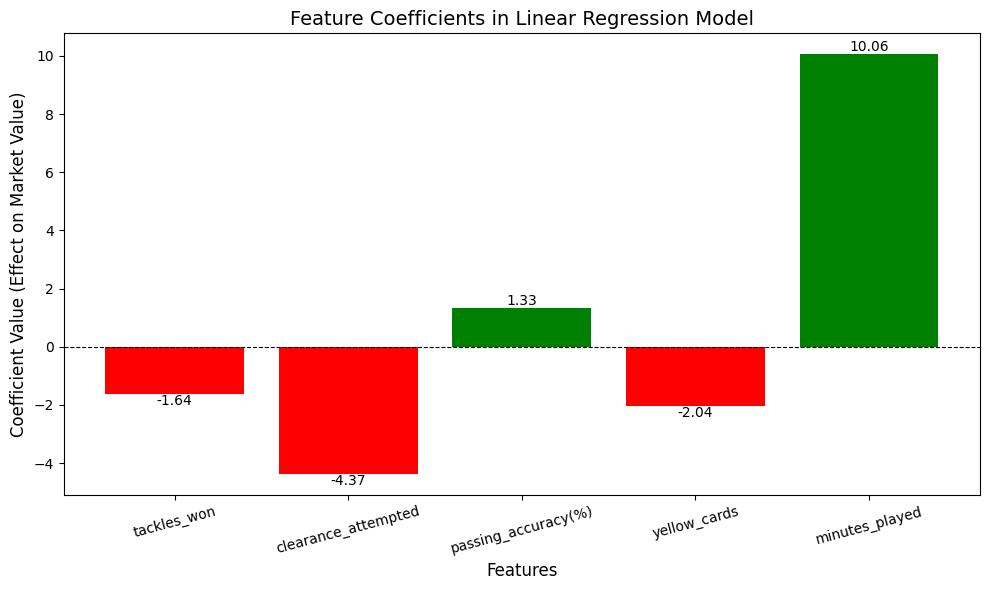

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Coefficients from your model
features = ['tackles_won', 'clearance_attempted', 'passing_accuracy(%)', 'yellow_cards', 'minutes_played']
coefficients = [-1.6413396217193335, -4.368805203655599, 1.3289357445213543, -2.0399128279127297, 10.057983553462643]

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(features, coefficients, color=['red' if coef < 0 else 'green' for coef in coefficients])

# Add labels on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom' if yval > 0 else 'top', fontsize=10)

# Chart formatting
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add horizontal line at 0
plt.title('Feature Coefficients in Linear Regression Model', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Coefficient Value (Effect on Market Value)', fontsize=12)
plt.xticks(rotation=15)  # Rotate feature labels for better readability
plt.tight_layout()
plt.show()

In [42]:
# Scale back coefficients
coefficients_in_euros = [coef * 1_000_000 for coef in coefficients]

for feature, coef in zip(features, coefficients_in_euros):
    print(f"{feature}: Each unit increases/decreases market value by €{coef:,.0f}.")

tackles_won: Each unit increases/decreases market value by €-1,641,340.
clearance_attempted: Each unit increases/decreases market value by €-4,368,805.
passing_accuracy(%): Each unit increases/decreases market value by €1,328,936.
yellow_cards: Each unit increases/decreases market value by €-2,039,913.
minutes_played: Each unit increases/decreases market value by €10,057,984.


# Linear Regression Performance Metrics

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)                       # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)             # R-squared

# Print Metrics
print("Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R² Score): {r2:.2f}")

Model Performance Metrics:
Mean Absolute Error (MAE): 14.12
Mean Squared Error (MSE): 258.30
Root Mean Squared Error (RMSE): 16.07
R-squared (R² Score): -1.16


In [43]:
# Calculate metrics for training set predictions
y_train_pred = model.predict(X_train_scaled)
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Calculate metrics for test set predictions
mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred)

# Print train vs test metrics
print("Train vs Test Set Performance:")
print(f"Training Set: MAE = {mae_train:.2f}, MSE = {mse_train:.2f}, RMSE = {rmse_train:.2f}, R² = {r2_train:.2f}")
print(f"Test Set:    MAE = {mae_test:.2f}, MSE = {mse_test:.2f}, RMSE = {rmse_test:.2f}, R² = {r2_test:.2f}")

Train vs Test Set Performance:
Training Set: MAE = 13.12, MSE = 286.47, RMSE = 16.93, R² = 0.18
Test Set:    MAE = 14.12, MSE = 258.30, RMSE = 16.07, R² = -1.16


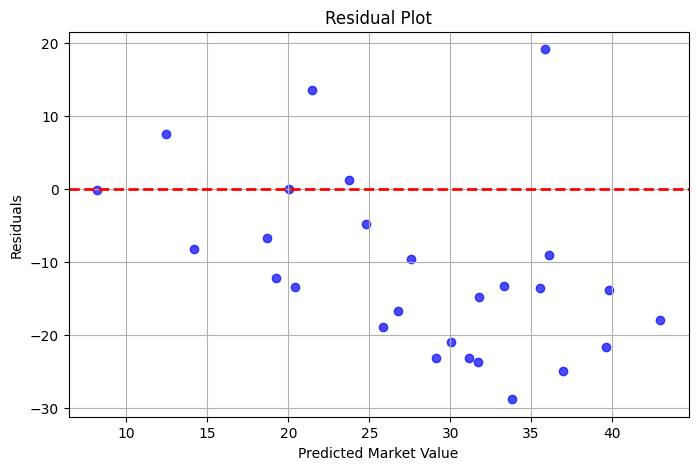

In [44]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.7, color='blue')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Market Value')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid()
plt.show()